I will introduce three very useful functions for evaluating the performance of a model, which will definitely be helpful for you.
Let's assume you've built an AI model that takes an input and outputs either zero or one, meaning it needs to classify the data into two classes.

I’ll assume that you’ve trained your model and provided some data as input, and you've obtained a vector of zeros and ones, which is the result of the model's prediction on the input data.

Also, we have a vector of labels.

So, we have two vectors: one for the true labels of the data and one for the predictions made by the model on those data. These two vectors have the same length. Since I haven't built a model yet, on which I want to explain and evaluate the results, I will manually create the two vectors I mentioned.

That is, I will create two vectors of the same length (for example, I made them of length 1000), where each vector contains only zeros and ones.


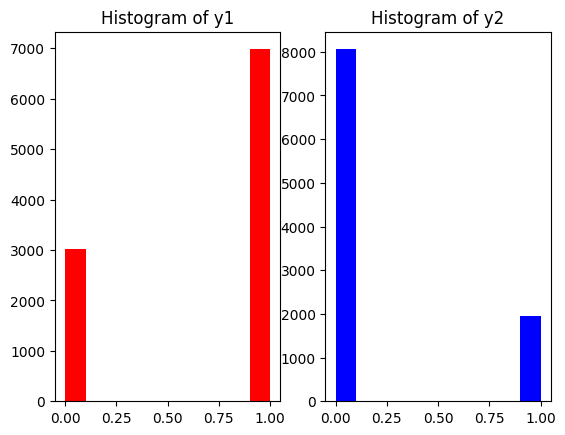

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

def make_zero_one_vector( length , probablity_of_one) : 
    r = np.random.rand(1 , length)
    r[r>probablity_of_one] = 0
    r[ (r<=0.7) & (r!= 0) ] = 1 
    return r.flatten()
y1 = make_zero_one_vector(10000 , 0.7)
y2 = make_zero_one_vector(10000 , 0.2)
fig , axes = plt.subplots(1 , 2)
axes[0].hist(y1 , bins=10 , color='red' , density=False)
axes[0].set_title('Histogram of y1')
axes[1].hist(y2 , bins=10 , color='blue' , density=False)
axes[1].set_title('Histogram of y2')
plt.show()



Let's first calculate how much accuracy we can get. Accuracy refers to how correctly our model has predicted, out of all the predictions. This means how many times it predicted zeros as zeros and ones as ones, which can be expressed as a probability using this formula. Keep in mind that since no actual model is involved and we randomly filled in ones and zeros, we can calculate the accuracy using the following formula

$accuracy = P(y_1 = 1) \cdot P(y_2 = 1) + P(y_1 = 0) \cdot P(y_2 = 0) = 0.3 \cdot 0.8 + 0.7 \cdot 0.2 = 0.4$

Now let's calculate it using the accuracy_score function : 

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y1 , y2)
print( accuracy)

0.379


Here’s the translation of your text to English:
One more important function we have is confusion_matrix.
To explain this, let's assume we have two classes. For example, we take class 1 as the positive class (representing ones), and class 0 as the negative class (representing zeros).
If our prediction is correct and we predict the positive class correctly, it's called a True Positive.
If we mistakenly predict a zero instead of a one (i.e., a negative class when it should have been positive), it's called a False Positive.
For the negative class, the situation is similar: if we predict it correctly, it is called a True Negative.
And if we predict the negative class incorrectly (i.e., predicting it as positive when it should have been negative), it's called a False Negative.
Finally, all of these values can be written in a matrix as follows:
\[
\begin{bmatrix}
\text{True Positive (TP)} & \text{False Positive (FP)} \\
\text{False Negative (FN)} & \text{True Negative (TN)}
\end{bmatrix}

Now let's write the code to get the values : 


In [16]:
from sklearn.metrics import confusion_matrix 
result = confusion_matrix(y1 , y2)
print(result)

[[2434  586]
 [5624 1356]]


Now let's go through all the steps, but this time with three classes: 

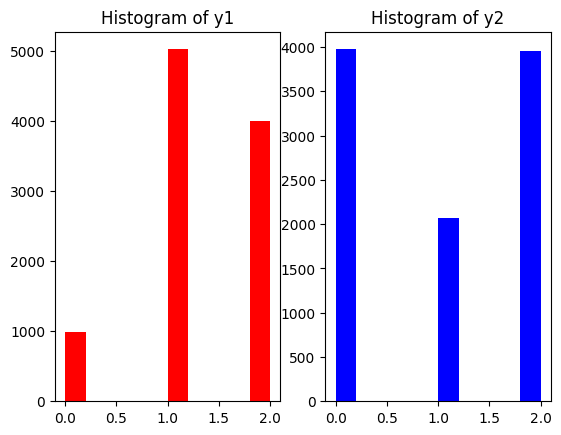

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
def make_random_class(lenght , probablites) : 
    p0 =probablites[0]
    p1 =probablites[1]
    r = np.random.rand(lenght , 1)
    r[r<p0] = 0
    r[(r>=p0) & (r<p1+p0)] = 1
    r[(r>=p1 + p0) & (r!=1)] = 2
    return r.flatten()

y1 = make_random_class(10000 , [0.1 , 0.5 , 0.4])
y2 = make_random_class(10000 , [0.4 , 0.2 , 0.4])

fig , ax = plt.subplots(1 , 2)
ax[0].hist(y1 , bins=10 ,  color = 'red')
ax[0].set_title('Histogram of y1')
ax[1].hist(y2 , bins=10 ,  color = 'blue')
ax[1].set_title('Histogram of y2')
plt.show()


Now, let's calculate the accuracy theoretically using the rules of probability and then write the code.

First, using the rules of probability, we can write:

$accuracy = P(y_1 = 0) \cdot P(y_2 = 0) + P(y_1 = 1) \cdot P(y_2 = 1) + P(y_1 = 2) \cdot P(y_2 = 2) = 0.1 \cdot 0.4 + 0.5 \cdot 0.2 + 0.4 \cdot 0.4$ = 0.3



In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y1 , y2)
print(accuracy)

0.3065


And the confusion matrix will be as following : 

In [29]:
from sklearn.metrics import confusion_matrix 
result = confusion_matrix (y1 , y2)
print(result)


[[ 410  198  375]
 [1986 1051 1981]
 [1578  817 1604]]
